## I start this kernel for discuss how to handle outliers in target values.

These bellow notebook show my anlysis resutl at current.

According to Wikipedia, an outlier is an observation point that is distant from other observations. This definition is vague because it doesn’t quantify the word “distant”. In this blog, we’ll try to understand the different interpretations of this “distant” notion. We will also look into the outlier detection and treatment techniques while seeing their impact on different types of machine learning models.

Outliers arise due to changes in system behavior, fraudulent behavior, human error, instrument error, or simply through natural deviations in populations. A sample may have been contaminated with elements from outside the population being examined.

Many machine learning models, like `linear & logistic regression`, are easily impacted by the outliers in the training data. Models like `AdaBoost` increase the weights of misclassified points on every iteration and therefore might put high weights on these outliers as they tend to be often misclassified. This can become an issue if that outlier is an error of some type, or if we want our model to generalize well and not care for extreme values.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib_venn import venn2
import seaborn as sns; sns.set()
%matplotlib inline

import os
print(os.listdir("../input"))

## Load train and test data.

In [ ]:
df_train = pd.read_csv("../input/train.csv", parse_dates=["first_active_month"], engine='c')
df_test = pd.read_csv("../input/test.csv", parse_dates=["first_active_month"], engine='c')
print("{} observations and {} features in train set.".format(*df_train.shape))
print("{} observations and {} features in test set.".format(*df_test.shape))

In [ ]:
df_train.target.describe()

`target` value min = -33.219281, mean = -0.39 75%=0.76 max = 17.96

As following, I will create some plots to show the target distribution and more

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df_train.target, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='target', data=df_train)

Above two plots show that `target` values range is so big, and most value range is [-1, +1], 

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 10))
sns.boxplot(x='feature_1', y='target', data=df_train, orient='v',dodge=False, ax=axs[0])
sns.boxplot(x='feature_2', y='target', data=df_train, orient='v',dodge=False, ax=axs[1])
sns.boxplot(x='feature_3', y='target', data=df_train, orient='v',dodge=False, ax=axs[2])

## Common Methods for Detecting Outliers

When detecting outliers, we are either doing univariate analysis or multivariate analysis. When your linear model has a single predictor, then you can use univariate analysis. However, it can give misleading results if you use it for multiple predictors. One common way of performing outlier detection is **to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed)**. This assumption is discussed in the Z-Score method section below.

### Box-Plot
The quickest and easiest way to identify outliers is by visualizing them using plots. If your dataset is not huge (approx. up to 10k observations & 100 features), I would highly recommend you build scatter plots & box-plots of variables. If there aren’t outliers, you’ll definitely gain some other insights like correlations, variability, or external factors like the impact of world war/recession on economic factors. However, this method is not recommended for high dimensional data where the power of visualization fails.

One box-plot like above showed.

The box plot uses inter-quartile range to detect outliers. Here, we first determine the quartiles Q1 and Q3.

Interquartile range is given by, IQR = Q3 — Q1

Upper limit = Q3+1.5*IQR

Lower limit = Q1–1.5*IQR

Anything below the lower limit and above the upper limit is considered an outlier

### Cook’s Distance
This is a multivariate approach for finding influential points. These points may or may not be outliers as explained above, but they have the power to influence the regression model. 

This method is used only for linear regression and therefore has a limited application. Cook’s distance measures the effect of deleting a given observation. It’s represents the sum of all the changes in the regression model when observation “i” is removed from it.

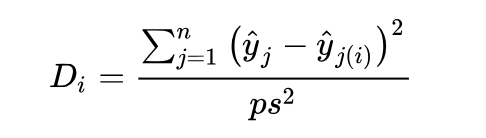

Here, p is the number of predictors and s² is the mean squared error of the regression model. There are different views regarding the cut-off values to use for spotting highly influential points. A rule of thumb is that D(i) > 4/n, can be good cut off for influential points.

## Z-Score
This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean:
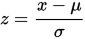

Here, we normally define outliers as points whose modulus of z-score is greater than a threshold value. This threshold value is usually greater than 2 (3 is a common value).

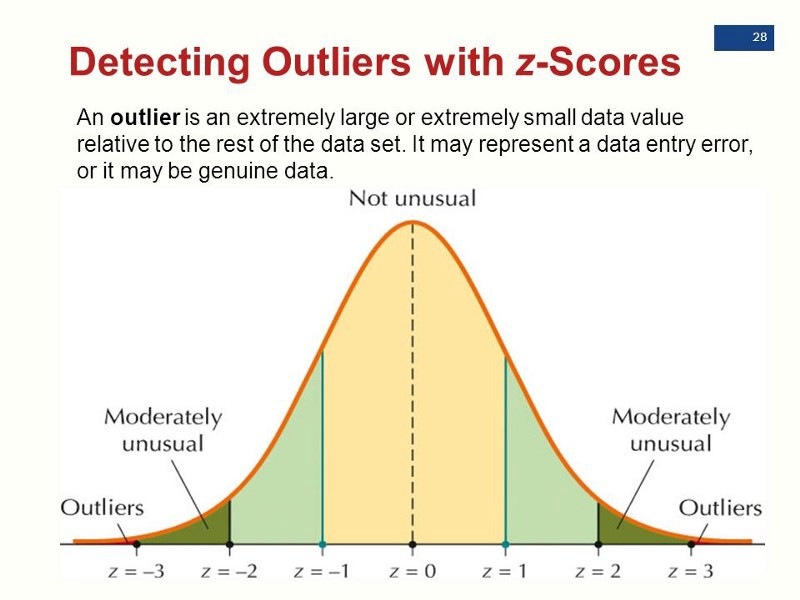

All the above methods are good for initial analysis of data, but they don’t have much value in multivariate settings or with high dimensional data. For such datasets, we have to use advanced methods like PCA, LOF (Local Outlier Factor) & HiCS: High Contrast Subspaces for Density-Based Outlier Ranking.

#### Impact & Treatment of Outliers
The impact of outliers can be seen not only in predictive modeling but also in statistical tests where it reduces the power of tests. Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly sensitive to outliers. But in this post, we are focusing only on the impact of outliers in predictive modeling.

#### To Drop or Not to Drop
I believe dropping data is always a harsh step and should be taken only in extreme conditions when we’re very sure that the outlier is a measurement error, which we generally do not know. The data collection process is rarely provided. When we drop data, we lose information in terms of the variability in data. When we have too many observations and outliers are few, then we can think of dropping these observations.

